In [1]:
import cv2
import os
import imghdr
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [2]:
data_dir='E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\Data'
image_exits=['jpeg','jpg','bmp','png']



In [3]:
for Image_class in os.listdir(data_dir):
  print(Image_class)

Happy
Sad


In [4]:
for Image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,Image_class)):
    image_path=os.path.join(data_dir,Image_class,image)
    try:
      # img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exits:
        print('Image is not in list ',image_path)
        os.remove(image_path)

    except Exception as e:
      print("issue with in-mage {}".format(image_path)) 

In [80]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=16)

Found 172 files belonging to 2 classes.


In [81]:
data_ietretor=data.as_numpy_iterator()

In [82]:
batch=data_ietretor.next()

# batch has two components
#onae is images and second is lables

In [83]:
batch[1]
#lables

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [84]:
batch[0].shape

(16, 256, 256, 3)

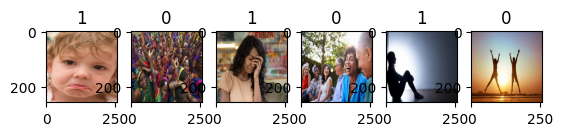

In [85]:
fig,ax=plt.subplots(ncols=6, figure=(20,20))
for idx,img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [11]:
##Sad poeple -----1
##Hapyy poeple ----0

Preprocess Data


In [86]:
#Scale adta

data=data.map(lambda x,y: (x/255,y))

In [87]:
scaled_iterator=data.as_numpy_iterator()

In [88]:
batch=scaled_iterator.next()

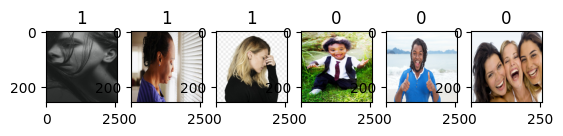

In [89]:
fig,ax=plt.subplots(ncols=6, figure=(20,20))
for idx,img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [91]:
batch[0].min()

0.0

In [92]:
len(data)

11

In [101]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.3)
test_size=int(len(data)*.1)


In [102]:
train_size

7

In [103]:
val_size

3

In [104]:
test_size


1

In [105]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [106]:
len(test)

1

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [108]:
model=Sequential()

In [109]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 16)       

In [112]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [113]:
hist1=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/30
7/7 [==============================] - 22s 2s/step - loss: 1.2239 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 2/30
7/7 [==============================] - 17s 2s/step - loss: 0.6826 - accuracy: 0.6071 - val_loss: 0.6637 - val_accuracy: 0.5417
Epoch 3/30
7/7 [==============================] - 16s 2s/step - loss: 0.6267 - accuracy: 0.5804 - val_loss: 0.6027 - val_accuracy: 0.8542
Epoch 4/30
7/7 [==============================] - 17s 2s/step - loss: 0.5878 - accuracy: 0.6607 - val_loss: 0.4987 - val_accuracy: 0.8542
Epoch 5/30
7/7 [==============================] - 17s 2s/step - loss: 0.5057 - accuracy: 0.8125 - val_loss: 0.4527 - val_accuracy: 0.7292
Epoch 6/30
7/7 [==============================] - 17s 2s/step - loss: 0.4515 - accuracy: 0.8393 - val_loss: 0.4731 - val_accuracy: 0.8958
Epoch 7/30
7/7 [==============================] - 16s 2s/step - loss: 0.3894 - accuracy: 0.9107 - val_loss: 0.2576 - val_accuracy: 0.9583
Epoch 8/30
7/7 [==================

In [114]:
hist1

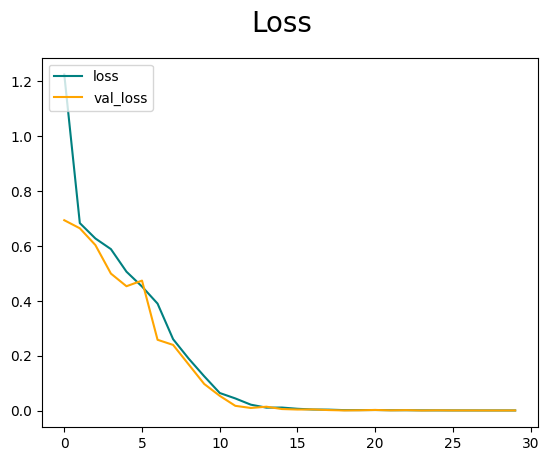

In [115]:

fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

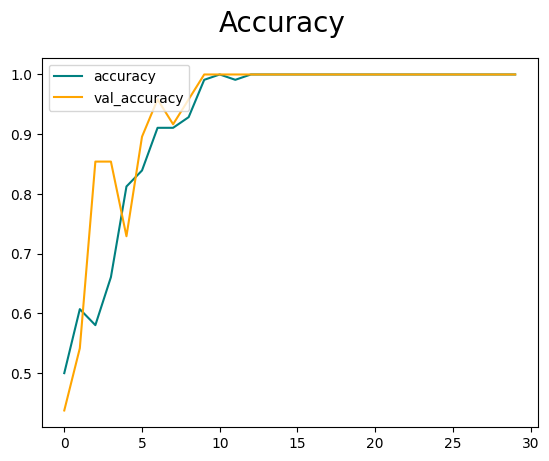

In [116]:
fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [117]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [118]:
pre=Precision()
Rec=Recall()
Binacc=BinaryAccuracy()

In [119]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    Rec.update_state(y,yhat)
    Binacc.update_state(y,yhat)


1/1 [==============================] - 0s 387ms/step


In [120]:
print(pre.result(),Rec.result(),Binacc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


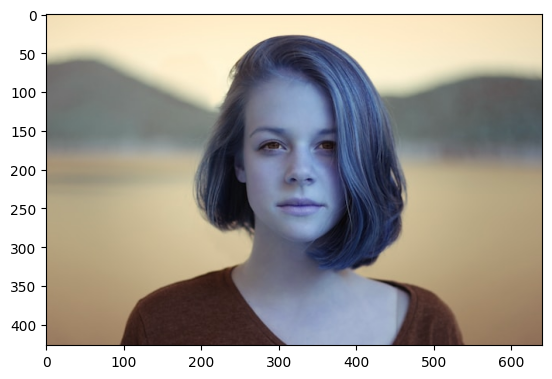

In [157]:
path=os.path.join('E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\TestData','sad4.jpg')
img=cv2.imread(path)
plt.imshow(img)
plt.show()

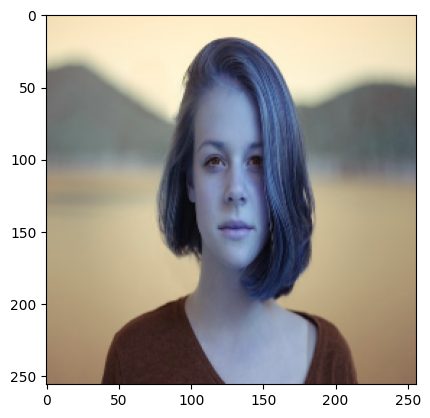

In [158]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [159]:
import numpy as np
pred=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 102ms/step


In [171]:
pred[0][0]*100 


99.99274015426636

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import numpy as np


In [11]:
# model = load_model(os.path.join("model", "imageclassifier.h5"))
model_path=r'E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\model\imageclassifier.h5'
model=load_model(model_path)
imagename = r'E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\TestData\haapy5.jpg'
# test_image = image.load_img(imagename, target_size = (224,224))
test_image = image.load_img(imagename, target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result=model.predict(np.expand_dims(test_image/255,0))
# result = np.argmax(model.predict(test_image), axis=1)
print(result)

if result > 0.5: 
   print(f'Predicted class is sad')
# prediction = 'Image Sentimens -- Sad'
# return [{ "image" : prediction}]
else:
    print(f'Predicted class is happy')
#    prediction = 'Image Sentimens -- Happy'
#    return [{ "image" : prediction}]

ValueError: in user code:

    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 1, 256, 256, 3)


In [161]:
if pred > 0.5: 
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


Save Model

In [131]:
from tensorflow.keras.models import load_model

In [134]:
model_path=os.path.join('E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\model')
model.save('models','imageclassifier.h5')

INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


In [135]:
new_model=load_model('imageclassifier.h5')

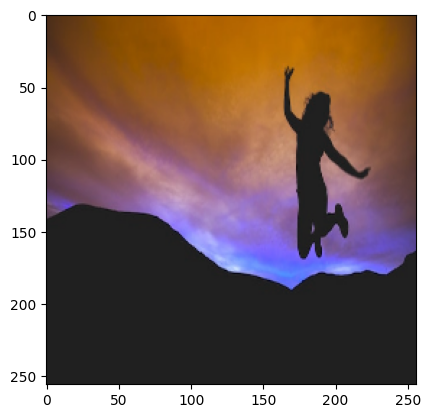

In [213]:
path=os.path.join('E:\ML_PROJECT\Computer Vision Project\ImageClassificationDeppCNN\TestData','haapy5.jpg')
img=cv2.imread(path)
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [214]:
pred=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 106ms/step


In [217]:
pred[0][0]*100

25.91577172279358

In [216]:
if pred > 0.5: 
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
